<a href="https://colab.research.google.com/github/shr3e23/HCAI5DS02_ShreekrishnaShrestha/blob/main/HCAI5DS02_ShreekrishnaShrestha_worksheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

file_path = '/content/drive/MyDrive/data analysis/AI_Usage.csv'
df = pd.read_csv(file_path)
df.head()


,Name,What is your Faculty/Program?,What is your current academic year?,How many times did you use any AI-based tool in the past 7 days?,What is the main purpose of your AI tool usage?,Which AI tools did you use?,Do you believe using AI tools improves your academic performance?,How likely are you to continue using AI tools in the future?
0,Sobika Pradhan,Networking and IT security,3rd Year,1–2 times,Studying/Research,"ChatGPT, Grammarly",Yes,5
1,Palsang dolma tamang,BSc,1st Year,3–5 times,Studying/Research,ChatGPT,Yes,3
2,Roshan Maharjan,BSc,4th Year,More than 10 times,Studying/Research,ChatGPT,Yes,5
3,Swastik Acharya,BCS,3rd Year,6–10 times,Studying/Research,ChatGPT,Yes,5
4,finjo lama,BIT,3rd Year,1–2 times,Studying/Research,ChatGPT,Maybe,3


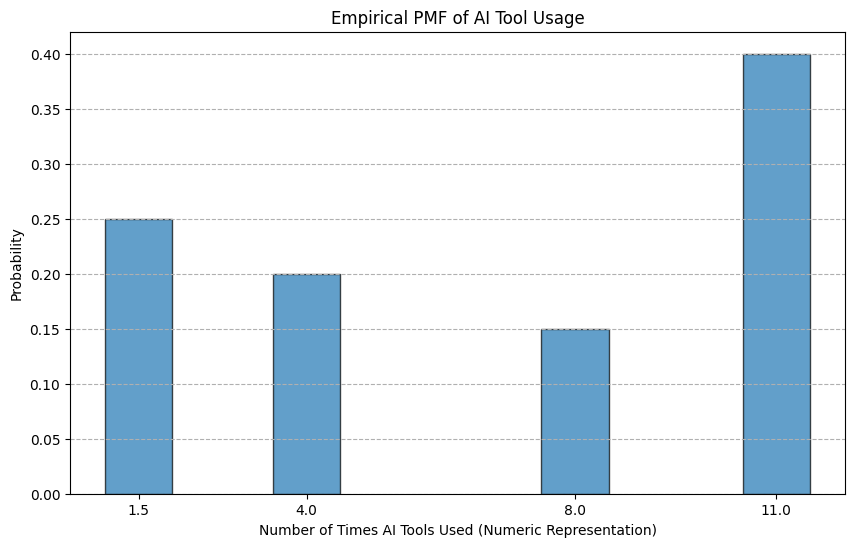

In [ ]:
df.columns = df.columns.str.strip()
ai_usage_col = 'How many times did you use any AI-based tool in the past 7 days?'
df.rename(columns={ai_usage_col: 'ai_usage_frequency'}, inplace=True)

def convert_usage_to_numeric(usage_str):
    if isinstance(usage_str, str):
        if '1–2 times' in usage_str:
            return 1.5
        elif '3–5 times' in usage_str:
            return 4
        elif '6–10 times' in usage_str:
            return 8
        elif 'More than 10 times' in usage_str:
            return 11
    return np.nan # This handles other cases or missing values

df['ai_usage_numeric'] = df['ai_usage_frequency'].apply(convert_usage_to_numeric)

df.dropna(subset=['ai_usage_numeric'], inplace=True)

# Creating a frequency table
frequency_table = df['ai_usage_frequency'].value_counts().reset_index()
frequency_table.columns = ['Usage Frequency', 'Count']

#Sorting table
frequency_order = ['1–2 times', '3–5 times', '6–10 times', 'More than 10 times']
frequency_table['Usage Frequency'] = pd.Categorical(frequency_table['Usage Frequency'], categories=frequency_order, ordered=True)
frequency_table = frequency_table.sort_values('Usage Frequency')

# Creating the empirical Probability Mass Function (PMF)
pmf_table = df['ai_usage_numeric'].value_counts(normalize=True).reset_index()
pmf_table.columns = ['Numeric Value', 'Probability']
pmf_table = pmf_table.sort_values('Numeric Value')


#Computing sample mean and sample variance
sample_mean = df['ai_usage_numeric'].mean()
sample_variance = df['ai_usage_numeric'].var()

# Plot the empirical distribution ---
plt.figure(figsize=(10, 6))
plt.bar(pmf_table['Numeric Value'], pmf_table['Probability'], width=1, edgecolor='black', alpha=0.7, label='Empirical PMF')
plt.xlabel('Number of Times AI Tools Used (Numeric Representation)')
plt.ylabel('Probability')
plt.title('Empirical PMF of AI Tool Usage')
plt.xticks(pmf_table['Numeric Value'])
plt.grid(axis='y', linestyle='--')



Frequency Table (New Data):
   Usage Frequency  Count
         1–2 times      5
         3–5 times      4
        6–10 times      3
More than 10 times      8

Empirical PMF Table (New Data):
 Numeric Value  Probability
           1.5         0.25
           4.0         0.20
           8.0         0.15
          11.0         0.40

Sample Mean (New Data): 6.78
Sample Variance (New Data): 16.70

Plot 'ai_usage_pmf_comparison'.


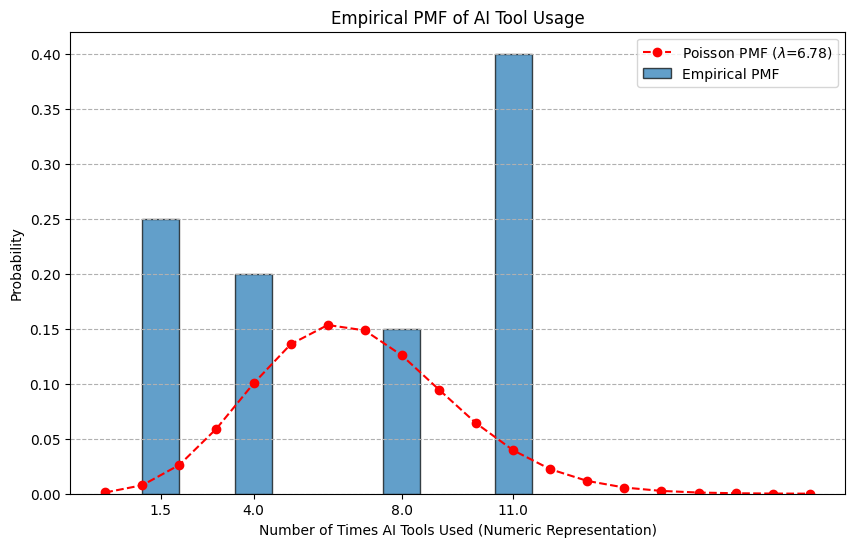

In [ ]:

#Choose a simple theoretical model (Poisson) and overlay its PMF
lambda_param = sample_mean

# Generate the x-values for the Poisson PMF plot.
x_values = np.arange(0, 20)
poisson_pmf = poisson.pmf(x_values, mu=lambda_param)

# Overlay the Poisson PMF on the plot
plt.figure(figsize=(10, 6))
plt.bar(pmf_table['Numeric Value'], pmf_table['Probability'], width=1, edgecolor='black', alpha=0.7, label='Empirical PMF')
plt.xlabel('Number of Times AI Tools Used (Numeric Representation)')
plt.ylabel('Probability')
plt.title('Empirical PMF of AI Tool Usage')
plt.xticks(pmf_table['Numeric Value'])
plt.grid(axis='y', linestyle='--')
plt.plot(x_values, poisson_pmf, 'ro--', label=f'Poisson PMF ($\lambda$={lambda_param:.2f})')
plt.legend()
plt.savefig('ai_usage_pmf_comparison_new.png')

print("Frequency Table (New Data):")
print(frequency_table.to_string(index=False))
print("\nEmpirical PMF Table (New Data):")
print(pmf_table.to_string(index=False))
print(f"\nSample Mean (New Data): {sample_mean:.2f}")
print(f"Sample Variance (New Data): {sample_variance:.2f}")
print("\nPlot 'ai_usage_pmf_comparison'.")

**What your variable measured and why it matters**

The variable measured the usage of AI tools by student in a week. It is important because it helps us to understand the adoption and reliance on AI in academic settings.

**Challenges in survey design or data collection**

Mapping ranges to numeric values introduces approximation.
Some responses may reflect estimation rather than exact counts.
The sample size is small but sufficient for a basic analysis.

**Model Fit**

The Poisson model with λ ≈ 6.78 gives a rough approximation.
It underestimates the high usage (11 times) and overestimates the mid-range (4–8 times).
This suggests the data may be overdispersed, meaning variance > mean, which is not ideal for Poisson.


**What you would do differently**

Ask for exact usage counts instead of ranges.
Increase the sample size for better generalization.
